# import library

In [50]:
# importing the library

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns


import io
from scipy import misc

%matplotlib inline

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# import data

In [2]:
# Read the data file

data=pd.read_csv('data.csv')
data.apply(pd.to_numeric, errors='ignore')


,customerid,billratetype,consumptionmonth,sum,unitme,capacity,suburb,postcode,billsaved
0,1,OGR,1.2011,2.060,KWH,3.78,HORNSBY,2076,1.0
1,2,PGR,1.2011,42.154,KWH,1.62,WYONG,2259,1.0
2,2,OGR,1.2011,0.550,KWH,1.62,WYONG,2259,1.0
3,3,PGR,1.2011,29.200,KWH,1.00,WYONG,2263,1.0
4,3,OGR,1.2011,0.524,KWH,1.00,WYONG,2263,1.0
5,4,PGR,1.2011,39.584,KWH,1.00,HURSTVILLE,2220,1.0
6,4,OGR,1.2011,0.179,KWH,1.00,HURSTVILLE,2220,1.0
7,4,SGR,1.2011,92.552,KWH,1.00,HURSTVILLE,2220,1.0
8,6,PGR,1.2011,62.503,KWH,2.00,SUTHERLAND,2230,1.0
9,6,OGR,1.2011,0.251,KWH,2.00,SUTHERLAND,2230,1.0


# explore data

In [3]:
# explore the data head
data.head()

,customerid,billratetype,consumptionmonth,sum,unitme,capacity,suburb,postcode,billsaved
0,1,OGR,1.2011,2.060,KWH,3.78,HORNSBY,2076,1.0
1,2,PGR,1.2011,42.154,KWH,1.62,WYONG,2259,1.0
2,2,OGR,1.2011,0.550,KWH,1.62,WYONG,2259,1.0
3,3,PGR,1.2011,29.200,KWH,1.00,WYONG,2263,1.0
4,3,OGR,1.2011,0.524,KWH,1.00,WYONG,2263,1.0


In [4]:
# The data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416054 entries, 0 to 416053
Data columns (total 9 columns):
customerid          416054 non-null int64
billratetype        416054 non-null object
consumptionmonth    416054 non-null float64
sum                 416054 non-null float64
unitme              416054 non-null object
capacity            416054 non-null float64
suburb              416054 non-null object
postcode            416054 non-null int64
billsaved           416053 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.6+ MB


In [5]:
# description of the data
data.describe()

,customerid,consumptionmonth,sum,capacity,postcode,billsaved
count,416054.000000,416054.000000,416054.000000,416054.000000,416054.000000,416053.000000
mean,1423.125005,6.698093,68.931230,2.033466,2202.884575,0.721045
std,781.000398,3.498677,95.451587,1.134470,91.010585,0.448486
min,1.000000,1.201100,-451.865000,1.000000,2008.000000,0.000000
25%,755.000000,3.201500,0.698000,1.500000,2114.000000,0.000000
50%,1424.000000,7.201000,32.872000,1.530000,2229.000000,1.000000
75%,2103.000000,10.201000,112.964000,2.160000,2282.000000,1.000000
max,2768.000000,12.201400,1437.576000,10.000000,2337.000000,1.000000


In [6]:
# colums in the data files
data.columns

Index(['customerid', 'billratetype', 'consumptionmonth', 'sum', 'unitme',
       'capacity', 'suburb', 'postcode', 'billsaved'],
      dtype='object')

# some visualization of data

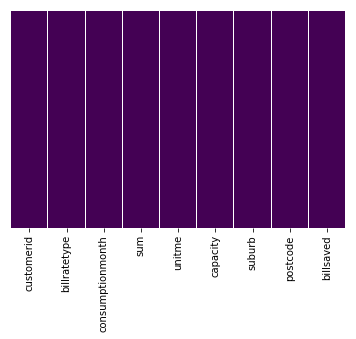

In [7]:
# exploring if there any missing values in the data file
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

-There is no missing value in to any columns

In [8]:
# custom coller pallate

red_blue=["#19585E","#EF4836"]
palette=sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

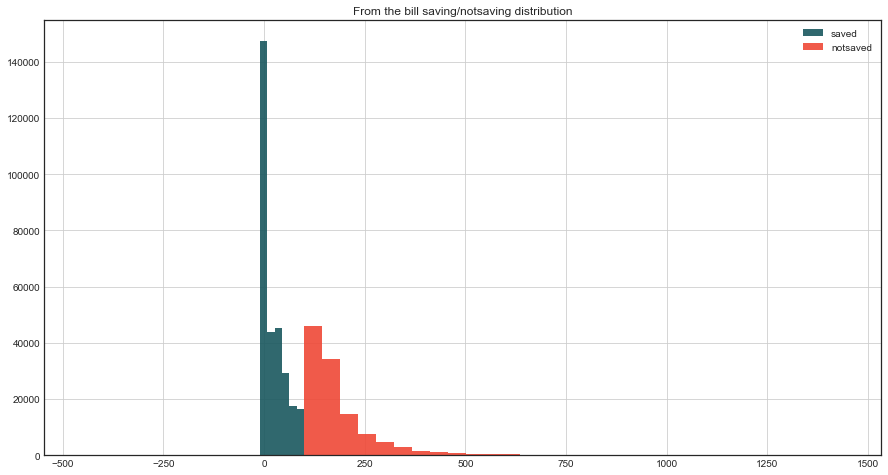

In [9]:
# visialise the data say the two kind of customer who has been saving from the ausgrid solar pannel or what kind of 
#customer not been savind from the billing system using 

pos_sum=data[data['billsaved']==1.0]['sum']
neg_sum=data[data['billsaved']==0]['sum']
fig=plt.figure(figsize=(15,8))
plt.title("From the bill saving/notsaving distribution")
pos_sum.hist(alpha=0.9, bins=30, label='saved')
neg_sum.hist(alpha=0.9, bins=30, label='notsaved')
plt.legend(loc="upper right")

# logistic regration

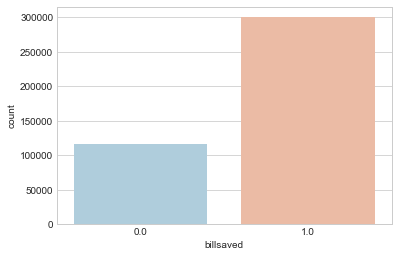

In [10]:
# the logistic regression model based on the two types of customers.

sns.set_style('whitegrid')
sns.countplot(x='billsaved',data=data,palette='RdBu_r')

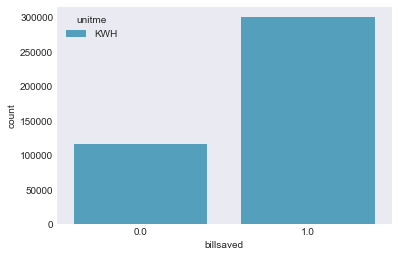

In [11]:
sns.set_style('dark')
sns.countplot(x='billsaved',hue='unitme',data=data,palette="GnBu_d")

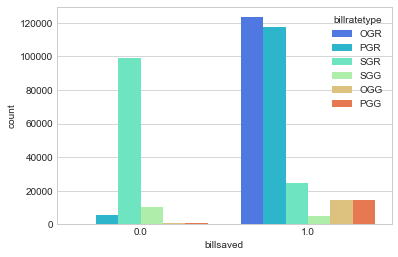

In [12]:
# using the sns exploring the customers of various time using the solar pannel
sns.set_style('whitegrid')
sns.countplot(x='billsaved',hue='billratetype',data=data,palette='rainbow')

#### most of the customer saved there bills while they was using capacity size-around 1 

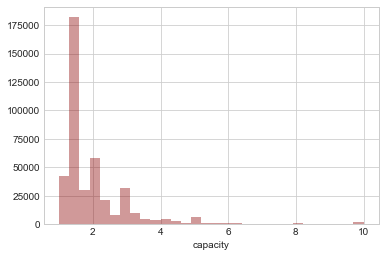

In [13]:
sns.distplot(data['capacity'].dropna(),kde=False,color='darkred',bins=30)

In [14]:
unit=pd.get_dummies(data['unitme'])

In [15]:
bill=pd.get_dummies(data['billratetype'])

In [16]:
data.drop(['unitme','billratetype'],axis=1,inplace=True)

In [17]:
data = pd.concat([data,unit,bill],axis=1)

In [18]:
data.head()

,customerid,consumptionmonth,sum,capacity,suburb,postcode,billsaved,KWH,OGG,OGR,PGG,PGR,SGG,SGR
0,1,1.2011,2.060,3.78,HORNSBY,2076,1.0,1,0,1,0,0,0,0
1,2,1.2011,42.154,1.62,WYONG,2259,1.0,1,0,0,0,1,0,0
2,2,1.2011,0.550,1.62,WYONG,2259,1.0,1,0,1,0,0,0,0
3,3,1.2011,29.200,1.00,WYONG,2263,1.0,1,0,0,0,1,0,0
4,3,1.2011,0.524,1.00,WYONG,2263,1.0,1,0,1,0,0,0,0


In [19]:
data.drop(['consumptionmonth','suburb'],axis=1,inplace=True)

In [20]:
data.head()

,customerid,sum,capacity,postcode,billsaved,KWH,OGG,OGR,PGG,PGR,SGG,SGR
0,1,2.060,3.78,2076,1.0,1,0,1,0,0,0,0
1,2,42.154,1.62,2259,1.0,1,0,0,0,1,0,0
2,2,0.550,1.62,2259,1.0,1,0,1,0,0,0,0
3,3,29.200,1.00,2263,1.0,1,0,0,0,1,0,0
4,3,0.524,1.00,2263,1.0,1,0,1,0,0,0,0


In [21]:
data.drop(['customerid'],axis=1,inplace=True)

In [22]:
data.drop(['postcode'],axis=1,inplace=True)

In [23]:
data.head()

,sum,capacity,billsaved,KWH,OGG,OGR,PGG,PGR,SGG,SGR
0,2.060,3.78,1.0,1,0,1,0,0,0,0
1,42.154,1.62,1.0,1,0,0,0,1,0,0
2,0.550,1.62,1.0,1,0,1,0,0,0,0
3,29.200,1.00,1.0,1,0,0,0,1,0,0
4,0.524,1.00,1.0,1,0,1,0,0,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416054 entries, 0 to 416053
Data columns (total 10 columns):
sum          416054 non-null float64
capacity     416054 non-null float64
billsaved    416053 non-null float64
KWH          416054 non-null uint8
OGG          416054 non-null uint8
OGR          416054 non-null uint8
PGG          416054 non-null uint8
PGR          416054 non-null uint8
SGG          416054 non-null uint8
SGR          416054 non-null uint8
dtypes: float64(3), uint8(7)
memory usage: 12.3 MB


In [25]:
data = data.fillna(method='ffill')

In [26]:
# this is the final structure of the data file which we use for the making the logistic regression model
data.head()

,sum,capacity,billsaved,KWH,OGG,OGR,PGG,PGR,SGG,SGR
0,2.060,3.78,1.0,1,0,1,0,0,0,0
1,42.154,1.62,1.0,1,0,0,0,1,0,0
2,0.550,1.62,1.0,1,0,1,0,0,0,0
3,29.200,1.00,1.0,1,0,0,0,1,0,0
4,0.524,1.00,1.0,1,0,1,0,0,0,0


# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=data[['sum','capacity','KWH','OGG','OGR','PGG','PGR','SGG','SGR']]
y=data['billsaved']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=51)

In [30]:
from sklearn.linear_model import LogisticRegression

# Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



# Evaluation

In [33]:
predictions = logmodel.predict(x_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     34593
        1.0       1.00      1.00      1.00     90224

avg / total       1.00      1.00      1.00    124817



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,predictions)

array([[34580,    13],
       [   42, 90182]], dtype=int64)

In [38]:
acc_log = round(logmodel.score(x_train, y_train) * 100, 2)
acc_log

99.96

In [39]:
acc_log = round(logmodel.score(x_test, y_test) * 100, 2)
acc_log

99.96

# Decision tree¶

In [40]:
# using the same data tree based algorithm is given bellow
from sklearn.tree import DecisionTreeClassifier

# Let's fit a model
tree = DecisionTreeClassifier(max_depth=100)
_ = tree.fit(x_train, y_train)

# Evaluate
#print('Classification report ({}):\n'.format(key))
print(classification_report(y_test, tree.predict(x_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     34593
        1.0       1.00      1.00      1.00     90224

avg / total       1.00      1.00      1.00    124817



In [41]:
from scipy.stats import chi2

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

In [42]:
from sklearn.grid_search import GridSearchCV

# Perform grid search
param_grid = [
    {'max_depth': [2, 3, 4, 5, 6],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(x_train, y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
for params, mean_score, scores in tree.grid_scores_:
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', tree.best_params_)

# Evaluate on held-out test
#print('\nClassification report ({}):\n'.format(key))
print(classification_report(y_test, tree.predict(x_test)))

C:\Users\golam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\golam\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Grid search mean and stdev:

1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
0.917 (+/-0.012) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
0.920 (+/-0.023) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
0.936 (+/-0.019) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
0.958 (+/-0.016) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
0.941 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.912 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'sp

# Support Vector Machines

In [52]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

99.99

# KNN

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

100.0

# Gaussian Naive Bayes

In [56]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

91.94

# Perceptron


In [58]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

C:\Users\golam\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


98.83

# Linear SVC

In [60]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

99.73

# Stochastic Gradient Descent

In [61]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

C:\Users\golam\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


99.79

# Decision Tree

In [62]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

# Random Forest

In [63]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

# Model evaluation

#### we can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score very close, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [64]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,100.00
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,99.99
2,Logistic Regression,99.96
6,Stochastic Gradient Decent,99.79
7,Linear SVC,99.73
5,Perceptron,98.83
4,Naive Bayes,91.94


# Hypotheses Testing

### comparing Billing data from solar and non solar customers.

#### Experimental setup

problem: find out whether solar or non solar is better? question: do they save from solar pannel null hypothesis: they saving bill from solar pannel.

In [43]:
solar_data = [2.06,42.154,0.55,29.2,0.524,39.584,0.17,92.552,62.503,0.251,67.675,0.673,2.414,23.176,0.198,76.53,32.331,60.745,0.688
,41.573,0.547,91.609,0.66,0.063,44.971,1.535,50.639,78.35,0.63,0.573,0.709,53.66,49.095,0.045,42.231,53.266,0.415,4.325,
86.707,0.113,41.653,0.156,56.456,0.475,36.105,0.351,22.692,0.538,95.594,0.56]

nonsolar_data = [30,46.363,65.379,57.812,63.59,30,54.864,56.838,23.84,88.18,30,77.917,37.822,33.239,47.444,31,64.342,57.816,
28.523,77.31,31,47.088,36.597,92.756,66.459,31,83.28,45.1,74.08,34.71,31,88.531,47.93,49.401,39.392,31,35.137,26.535,57.425,
43.069,31,26.049,47.652,27.435,58.89,31,42.401,22.989,26.378,67.788]

print('solar median:', np.median(solar_data))
print('nonsolar median:', np.median(nonsolar_data))
print('solar standarddaviation :', np.std(solar_data))
print('nonsolar standarddaviation :', np.std(nonsolar_data))
print('solar avarage :', np.average(solar_data))
print('nonsolar avg :', np.average(nonsolar_data))

solar median: 13.5085
nonsolar median: 44.084500000000006
solar standarddaviation : 30.9548782638472
nonsolar standarddaviation : 19.157821360989878
solar avarage : 27.80548
nonsolar avg : 47.507020000000004


### Can we reject the null hypothesis at p<0.05 using the Mann-Whitney U test?

#### Do customer saving from solar pannel?

In [44]:
from scipy import stats

mwu_result = stats.mannwhitneyu(solar_data, nonsolar_data)
print('Can we reject H0?', 'Yes' if mwu_result.pvalue>0.05 else 'No')

# 2 -
print('Is there a reliable difference?',
      'Yes' if mwu_result.pvalue>0.05 else 'No',
      '(p={:.6f})'.format(mwu_result.pvalue))

Can we reject H0? No
Is there a reliable difference? No (p=0.000272)


#### p-haking example

In [45]:
import numpy as np
N = 50
solar_mu, solar_sigma = 27.80548, 30.9548782638
nonsolar_mu, nonsolar_sigma = 47.50702, 19.157821361

def run_experiment():
    solar_bill= np.random.normal(solar_mu, solar_sigma, N)
    nonsolar_bill = np.random.normal(nonsolar_mu, nonsolar_sigma, N)
    return stats.ttest_ind(solar_bill, nonsolar_bill).pvalue*0.5 # one-tailed for testing G_mu > L_mu

#### Run 50 experiments

#### For what percentage of experiments do we fail to reject the null hypothesis at 0.05?

In [46]:
# 1 - 
NUM_EXPTS = 50
pvalues = [run_experiment() for _ in range(NUM_EXPTS)]

# 2 -
ALPHA = 0.05
print('We fail to reject H0 {:.0f}% of the time.'.format(100*sum([1 if p>ALPHA else 0 for p in pvalues])/NUM_EXPTS))

# 3 - You can also run multiple times. The result varies with different samples even though it's generated from the same population!

# 4 - Try increasing N above to 10000.

We fail to reject H0 0% of the time.


#### botstraping statistics for solar data

In [47]:
S = 100

def bootstrap_sample(solardata):
    return [np.random.choice(solardata) for _ in solardata]

def bootstrap_statistic(solardata, stats_fn, num_samples):
    return [stats_fn(bootstrap_sample(solardata)) for _ in range(num_samples)]

bs_mean = bootstrap_statistic(solar_data, np.mean, S)
print(bs_mean[:5])

[37.92542, 36.7948, 30.506459999999997, 33.37654, 26.885299999999994]


#### compute confidence interval

In [48]:
def bootstrap_ci(stats, level):
    lower_percentile = 0.5*level
    upper_percentile = 100 - 0.5*level
    return np.percentile(stats, lower_percentile), np.percentile(stats, upper_percentile)

lb, ub = bootstrap_ci(bs_mean, 0.05)

print('{:.3f} [{:.3f},{:.3f}]'.format(np.mean(solar_data), lb, ub))

27.805 [15.395,40.625]
